In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import statsmodels.api as sm
import patsy
import scipy.stats as stats
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble  import RandomForestRegressor
pd.set_option('display.max_columns', 75)
pd.set_option('display.max_rows', 100)

import multiprocessing
import xgboost as xgb

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import multiprocessing
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier

In [3]:
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows', 100)


In [4]:
path = "/Users/rafa/Desktop/Project/Data/FM 2023.csv"
df = pd.read_csv(path)

In [5]:
count = (df["Values"] == 347975206).sum()
df.drop(df[df["Values"] == 347975206].index, inplace=True)

In [6]:
count = (df["Values"] >= 50000000).sum()
df.drop(df[df["Values"] >= 500000006].index, inplace=True)


In [7]:
df.drop(df[df["Values"] > 50000000].index, inplace=True)


In [8]:
count = (df["Values"] <= 50000).sum()
count

164

In [9]:
df.drop(df[df["Values"] <= 50000].index, inplace=True)


In [10]:
df

,Name,Position,Age,ca,pa,Nationality,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,Current reputation,Domestic reputation,World reputation,Race,RCA,Colour of skin,Date of birth,Number of national team appearances,Goals scored for the national team,Salary,Rental club,UID
9,Lionel Messi,AM/S RC,35,180,200,"Argentina,Spain",Paris Saint-Germain,15,15,20,17,19,18,10,16,4,4,19,17,7,20,7,17,10,16,11,20,18,20,20,14,13,5,12,7,15,15,18,6,14,15,12,9,16,9,18,6,12,2,2,3,2,2,2,2,1,3,1,3,17,18,5,17,19,17,15,14,1,1,1,1,1,1,1,8,12,8,11,19,20,19,169,67,20,12,43973205,9374,9359,9267,Mediterranean_Hispanic,172,3,1987/6/24,162,86,776712.0,NaN,7458500
10,Luka Modrić,M C,36,179,180,Croatia,R. Madrid,16,16,17,9,20,13,8,14,7,8,19,14,11,19,12,17,14,18,18,19,18,17,13,14,15,15,17,16,12,14,13,7,13,13,13,8,15,12,16,11,16,2,2,1,3,3,1,1,2,1,2,1,10,15,5,17,17,20,19,17,1,1,1,1,1,1,14,8,20,5,1,15,1,1,172,67,13,20,30331138,9000,9265,9000,Northern_European,176,5,1985/9/9,152,22,321918.0,NaN,653054
28,Thiago Silva,D C,37,168,174,"Brazil,France",Chelsea,4,5,9,7,14,8,17,7,7,17,13,14,16,13,17,17,15,20,17,13,17,15,8,19,8,19,15,14,10,12,16,13,14,10,14,14,15,7,13,11,8,4,2,2,3,1,3,2,2,1,1,2,13,17,6,15,11,20,18,15,1,1,20,1,1,1,1,1,1,1,1,1,1,1,183,79,8,20,26674923,8400,8250,7750,Mixed_Race,164,12,1984/9/22,107,7,114999.0,NaN,8833628
30,N'Golo Kanté,DM/M C,31,167,170,"France,Mali",Chelsea,6,12,11,10,14,8,10,10,6,12,15,9,19,14,15,20,15,14,16,14,16,19,13,5,15,15,20,20,14,13,15,7,18,14,18,11,19,5,20,8,10,1,3,2,2,1,3,3,1,2,3,2,18,13,1,17,15,20,15,15,1,1,1,1,1,1,18,12,20,12,10,14,12,1,168,72,8,20,48067182,8350,8200,8000,African_Caribbean,156,17,1991/3/29,53,2,336376.0,NaN,85081880
35,Toni Kroos,DM/M C,32,166,176,Germany,R. Madrid,19,18,14,13,18,14,7,17,8,8,20,13,9,16,9,17,9,18,14,18,17,10,11,12,15,14,16,11,11,10,12,10,12,12,12,14,13,10,14,7,13,1,3,2,3,1,1,3,1,1,1,3,8,14,7,10,14,17,18,17,1,1,1,1,1,1,17,10,20,1,1,11,1,1,183,76,15,20,37521116,8300,8500,7700,Northern_European,164,5,1990/1/4,105,17,359588.0,NaN,156772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8445,Callum Perry,M/AM L,16,48,140,England,Coventry City,5,9,12,5,4,4,2,5,4,2,12,1,5,9,12,5,4,4,3,8,6,7,11,9,9,1,6,11,13,13,5,8,6,12,10,3,8,8,11,13,10,3,2,1,3,3,2,1,3,1,2,3,16,12,5,11,12,11,11,17,1,1,1,1,1,1,1,20,1,1,20,1,1,1,174,0,20,7,235092,2412,2787,602,Northern_European,40,255,2005/10/12,0,0,203.0,NaN,2000218865
8446,William Gutierrez Ramirez,D R,16,46,135,England,Reading,3,3,3,4,8,1,6,3,4,7,5,2,4,7,8,9,7,6,8,6,14,10,5,4,1,8,6,6,14,14,5,2,13,10,6,1,12,7,7,5,9,2,3,1,3,3,3,2,3,2,2,1,8,11,3,10,10,10,10,12,1,1,1,20,1,15,1,1,1,1,1,1,1,1,158,0,7,20,132370,2049,1708,171,Mediterranean_Hispanic,32,10,2006/6/22,0,0,203.0,NaN,2000224941
8447,Joe Ashton,D L,16,45,135,England,Burnley,3,4,5,4,4,1,6,1,5,6,3,1,12,6,7,9,7,6,9,6,12,11,5,3,5,11,6,6,13,10,6,11,16,12,6,7,17,5,7,5,8,3,2,1,2,2,1,3,3,2,1,3,14,12,1,9,11,11,11,20,1,20,1,1,1,1,1,1,1,1,1,1,1,1,181,0,20,7,124343,2120,2270,236,Northern_European,41,3,2006/6/

In [11]:
df.columns

Index(['Name', 'Position', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners',
       'Crossing', 'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking',
       'Heading', 'Long Shots', 'Long Throws', 'Marking', 'Passing',
       'Penalty Taking', 'Tackling', 'Technique', 'Aggressiion',
       'Anticipation', 'Bravery', 'Composure', 'Concentration', 'Vision',
       'Decision', 'Determination', 'Flair', 'Leadership', 'Off The Ball',
       'Position.1', 'Teamwork', 'Work Rate', 'Acceleration', 'Agility',
       'Balance', 'Jumping Reach', 'Natural Fitness', 'Pace', 'Stamina',
       'Strength', 'Stability', 'Foul', 'Contest performance', 'Injury',
       'diversity', 'Aerial Reach', 'Command Of Area', 'Communication',
       'Eccentricity', 'Handling', 'Kicking', 'One On Ones', 'Reflexes',
       'Rushing Out', 'Punching', 'Throwing', 'Adaptation', 'Ambition',
       'Argue', 'Loyal', 'Resistant to stress', 'Professional',
       'Sportsmanship', 'Emotional control', 'GK', 'DL', 

In [12]:
df.drop(["Nationality","Rental club","Salary","Colour of skin","Date of birth","Number of national team appearances","Goals scored for the national team","Race","World reputation","Domestic reputation","Current reputation","RCA" ], axis=1,inplace=True)

In [13]:
df = pd.DataFrame(df)

columns_to_check = {
    "GK", "DL", "DC", "DR", "WBL", "WBR", "DM", "ML", "MC", "MR", "AML", "AMC", "AMR", "ST"
}

def find_column_name(row):
    for col_name in columns_to_check:
        if row[col_name] == 20:
            return col_name
    return None

df['Best_Position'] = df.apply(find_column_name, axis=1)


Cleaning

In [14]:
amr_df = df[(df["Best_Position"] == "DM")]
amr_df = amr_df.reset_index(drop=True)
amr_df

,Name,Position,Age,ca,pa,Club,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing,Adaptation,Ambition,Argue,Loyal,Resistant to stress,Professional,Sportsmanship,Emotional control,GK,DL,DC,DR,WBL,WBR,DM,ML,MC,MR,AML,AMC,AMR,ST,Height,Weight,Left Foot,Right Foot,Values,UID,Best_Position
0,Sergio Busquets,DM/M C,34,157,171,Barcelona,8,11,12,8,16,8,11,9,8,15,17,10,15,16,12,19,12,18,18,16,18,16,9,13,10,17,19,15,10,10,11,14,15,11,12,11,16,13,14,5,13,1,1,3,3,1,2,3,1,3,2,3,15,14,7,18,14,14,6,9,1,1,8,1,1,1,20,1,18,1,1,1,1,1,189,76,12,20,22162801,1510566,DM
1,Kalvin Phillips,DM/M C,26,152,156,Manchester City,13,12,11,9,13,13,11,11,5,13,15,10,16,13,16,15,16,13,14,14,13,16,10,10,11,15,15,18,13,13,14,11,18,14,17,14,14,13,13,10,13,2,2,4,3,1,1,3,2,2,2,3,16,13,1,17,15,16,11,18,1,1,12,1,1,1,20,1,17,1,1,9,1,1,178,72,11,20,48341458,29113879,DM
2,Stanislav Lobotka,DM/M C,27,150,155,Parthenope,4,11,14,6,17,4,5,9,5,12,16,8,17,17,13,14,15,17,15,14,15,15,12,10,9,14,17,15,13,15,16,7,15,12,15,10,15,5,11,12,11,1,2,2,3,3,3,3,3,3,3,1,13,14,3,15,13,15,16,16,1,1,1,1,1,1,20,1,18,1,1,14,1,1,172,64,13,20,30058676,63012964,DM
3,Danilo Pereira,D/DM C,30,150,153,Paris Saint-Germain,6,8,11,8,11,7,14,12,8,14,13,12,15,12,12,14,14,13,15,12,13,14,9,14,12,15,15,14,13,13,14,15,17,13,15,16,15,9,13,6,11,2,1,3,2,3,3,2,2,2,3,3,14,15,9,14,14,18,17,18,1,1,19,1,1,1,20,1,15,1,1,1,1,1,188,83,12,20,25055013,55013032,DM
4,Geoffrey Kondogbia,DM/M C,29,149,155,A. Madrid,8,11,15,12,15,8,14,16,7,12,15,9,15,16,16,14,16,12,11,13,13,13,14,14,13,15,14,15,14,14,16,14,15,14,16,16,13,13,12,9,12,2,4,1,1,2,1,2,1,1,3,3,11,15,9,13,13,15,14,14,1,1,1,1,1,1,20,1,19,1,1,5,1,1,188,80,20,7,22274691,85033422,DM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Aldo Llanas,DM/M C,19,70,-75,Deportivo Toluca,9,8,6,9,11,9,9,9,10,10,11,6,11,9,10,11,11,8,8,8,8,13,5,9,7,11,10,12,11,8,8,5,12,11,12,7,9,9,4,6,14,1,1,2,1,1,4,3,3,1,3,3,12,11,5,10,10,12,8,12,1,1,1,1,1,1,20,1,17,1,1,1,1,1,170,57,10,20,5618069,2000078827,DM
442,Sebastián Martínez,DM/M C,19,70,-75,CF América,6,5,6,4,11,6,11,8,10,11,11,9,12,10,11,11,9,8,10,8,10,12,6,10,7,11,11,11,11,9,7,5,10,11,11,5,11,11,11,11,13,1,2,1,1,2,3,1,3,2,1,1,10,13,6,12,11,12,12,20,1,1,1,1,1,1,20,1,16,1,1,1,1,1,179,72,10,20,1355111,2000211177,DM
443,Jack Patterson,DM/M C,16,65,-75,Everton,5,5,6,4,12,2,6,6,2,4,10,1,11,7,5,3,7,10,7,11,13,12,5,8,6,7,7,12,12,13,6,6,14,10,7,6,6,12,12,6,9,1,3,4,1,2,4,3,3,1,4,2,17,11,2,11,10,13,9,18,1,1,15,1,1,1,20,1,17,1,1,1,1,1,178,0,20,9,14580161,2000006171,DM
444,Diogo Lobão,DM/M C,16,65,-75,Vitória Sport Clube,1,2,2,6,13,5,5,2,1,6,12,3,12,13,11,9,7,6,7,11,9,13,5,7,4,4,7,12,13,13,6,6,14,13,7,7,16,9,11,11,8,1,2,4,3,1,3,2,3,4,1,3,16,11,5,10,12,9,11,14,1,1,1,1,1,1,20,1,17,1,1,1,1,1,176,64,20,7,979999,2000183115,DM


Keep Attibutes


In [15]:
AMR_detailed_features = ['Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing']

In [16]:
amr_df = amr_df[['Age','Values','Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Position.1', 'Teamwork',
       'Work Rate', 'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing']].applymap(lambda x: np.nan if x < 0 else x).dropna()


In [17]:
amr_df

,Age,Values,Corners,Crossing,Dribbling,Finishing,First Touch,Free Kick Taking,Heading,Long Shots,Long Throws,Marking,Passing,Penalty Taking,Tackling,Technique,Aggressiion,Anticipation,Bravery,Composure,Concentration,Vision,Decision,Determination,Flair,Leadership,Off The Ball,Position.1,Teamwork,Work Rate,Acceleration,Agility,Balance,Jumping Reach,Natural Fitness,Pace,Stamina,Strength,Stability,Foul,Contest performance,Injury,diversity,Aerial Reach,Command Of Area,Communication,Eccentricity,Handling,Kicking,One On Ones,Reflexes,Rushing Out,Punching,Throwing
0,34,22162801,8,11,12,8,16,8,11,9,8,15,17,10,15,16,12,19,12,18,18,16,18,16,9,13,10,17,19,15,10,10,11,14,15,11,12,11,16,13,14,5,13,1,1,3,3,1,2,3,1,3,2,3
1,26,48341458,13,12,11,9,13,13,11,11,5,13,15,10,16,13,16,15,16,13,14,14,13,16,10,10,11,15,15,18,13,13,14,11,18,14,17,14,14,13,13,10,13,2,2,4,3,1,1,3,2,2,2,3
2,27,30058676,4,11,14,6,17,4,5,9,5,12,16,8,17,17,13,14,15,17,15,14,15,15,12,10,9,14,17,15,13,15,16,7,15,12,15,10,15,5,11,12,11,1,2,2,3,3,3,3,3,3,3,1
3,30,25055013,6,8,11,8,11,7,14,12,8,14,13,12,15,12,12,14,14,13,15,12,13,14,9,14,12,15,15,14,13,13,14,15,17,13,15,16,15,9,13,6,11,2,1,3,2,3,3,2,2,2,3,3
4,29,22274691,8,11,15,12,15,8,14,16,7,12,15,9,15,16,16,14,16,12,11,13,13,13,14,14,13,15,14,15,14,14,16,14,15,14,16,16,13,13,12,9,12,2,4,1,1,2,1,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,19,5618069,9,8,6,9,11,9,9,9,10,10,11,6,11,9,10,11,11,8,8,8,8,13,5,9,7,11,10,12,11,8,8,5,12,11,12,7,9,9,4,6,14,1,1,2,1,1,4,3,3,1,3,3
442,19,1355111,6,5,6,4,11,6,11,8,10,11,11,9,12,10,11,11,9,8,10,8,10,12,6,10,7,11,11,11,11,9,7,5,10,11,11,5,11,11,11,11,13,1,2,1,1,2,3,1,3,2,1,1
443,16,14580161,5,5,6,4,12,2,6,6,2,4,10,1,11,7,5,3,7,10,7,11,13,12,5,8,6,7,7,12,12,13,6,6,14,10,7,6,6,12,12,6,9,1,3,4,1,2,4,3,3,1,4,2
444,16,979999,1,2,2,6,13,5,5,2,1,6,12,3,12,13,11,9,7,6,7,11,9,13,5,7,4,4,7,12,13,13,6,6,14,13,7,7,16,9,11,11,8,1,2,4,3,1,3,2,3,4,1,3


In [18]:
# f_regression for pearsons correlation
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X = amr_df[AMR_detailed_features]
y = amr_df["Values"]
# define feature selection
fs = SelectKBest(score_func=f_regression, k = 15)
# apply feature selection
X_selected = fs.fit_transform(X, y)

In [19]:
np.sort(fs.scores_)


array([2.21788463e-03, 4.89063763e-03, 5.70395819e-02, 6.22802134e-02,
       1.14877336e-01, 1.44915652e-01, 1.49361475e-01, 1.50303732e-01,
       1.65172708e-01, 1.86604933e-01, 2.16467104e-01, 2.29040053e-01,
       2.53017556e-01, 4.47140866e-01, 4.69647536e-01, 4.91422661e-01,
       5.36703901e-01, 6.51337138e-01, 7.72719190e-01, 8.47046641e-01,
       8.59893709e-01, 8.68654579e-01, 8.70116955e-01, 9.09635727e-01,
       1.01849886e+00, 1.02028899e+00, 1.07144866e+00, 1.07654026e+00,
       1.36897454e+00, 1.49255097e+00, 1.53278922e+00, 1.62349754e+00,
       1.62728863e+00, 1.63489715e+00, 1.96242726e+00, 1.96761470e+00,
       2.10413643e+00, 2.21081409e+00, 2.29896001e+00, 2.43713957e+00,
       2.55552267e+00, 2.73206781e+00, 3.60688318e+00, 3.88429403e+00,
       4.35418581e+00, 4.85867119e+00, 4.94546378e+00, 5.22689313e+00,
       5.91611618e+00, 6.88039263e+00, 7.38465592e+00, 8.28220617e+00])

In [20]:
AMR_essential_ft = list(fs.get_feature_names_out(AMR_detailed_features))
AMR_essential_ft

['First Touch',
 'Long Throws',
 'Marking',
 'Passing',
 'Technique',
 'Aggressiion',
 'Determination',
 'Flair',
 'Leadership',
 'Position.1',
 'Acceleration',
 'Natural Fitness',
 'Pace',
 'Foul',
 'Kicking']

In [21]:
if 'Age' not in AMR_essential_ft:#
    AMR_essential_ft+=['Age']
if 'Values' not in AMR_essential_ft:#
    AMR_essential_ft+=['Values']

In [22]:

amr_df = amr_df.loc[:, AMR_essential_ft]

In [23]:

# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)


Correlation

In [24]:
#looking for correlation
corr_matrix = amr_df.corr()
corr_matrix

,First Touch,Long Throws,Marking,Passing,Technique,Aggressiion,Determination,Flair,Leadership,Position.1,Acceleration,Natural Fitness,Pace,Foul,Kicking,Values,reversed_age
First Touch,1.000000,-0.072837,0.055265,0.647588,0.611428,-0.123757,0.021317,0.284632,0.029938,0.088437,-0.038581,-0.060880,-0.042480,-0.053533,-0.031260,0.098547,-0.179262
Long Throws,-0.072837,1.000000,0.287425,0.000796,0.026580,0.210555,0.062620,0.024316,0.233816,0.152103,0.027831,0.085367,0.065883,0.156577,0.067478,-0.135322,-0.312538
Marking,0.055265,0.287425,1.000000,0.057070,0.031808,0.395248,0.087320,0.054615,0.328496,0.545637,0.103153,0.152277,0.166588,0.259850,-0.032693,-0.075649,-0.478576
Passing,0.647588,0.000796,0.057070,1.000000,0.600978,0.034036,0.035622,0.285043,0.163982,0.176240,-0.121000,0.009751,-0.073191,-0.022442,-0.144717,0.104041,-0.212030
Technique,0.611428,0.026580,0.031808,0.600978,1.000000,-0.022665,0.066360,0.346252,0.057381,0.080495,-0.055191,0.001979,0.012071,-0.066805,-0.086389,0.114671,-0.136630
Aggressiion,-0.123757,0.210555,0.395248,0.034036,-0.022665,1.000000,0.280029,0.134580,0.311098,0.344695,0.040579,0.254542,0.094688,0.390845,-0.008627,-0.070389,-0.409879
Determination,0.021317,0.062620,0.087320,0.035622,0.066360,0.280029,1.000000,0.181810,0.140864,0.098011,0.028726,0.265742,0.004703,0.131299,-0.058864,0.107867,-0.209732
Flair,0.284632,0.024316,0.054615,0.285043,0.346252,0.134580,0.181810,1.000000,0.107450,0.070796,0.125645,0.094535,0.075336,0.042113,0.009206,0.073886,-0.171147
Leadership,0.029938,0.233816,0.328496,0.163982,0.057381,0.311098,0.140864,0.107450,1.000000,0.335936,-0.104839,0.127054,-0.069362,0.251384,-0.019053,-0.127906,-0.493941
Position.1,0.088437,0.152103,0.545637,0.176240,0.080495,0.344695,0.098011,0.070796,0.335936,1.000000,0.023365,0.148281,0.099765,0.196387,-0.088954,-0.104956,-0.493695


Text(0.5, 1.0, 'Correlation Heatmap')

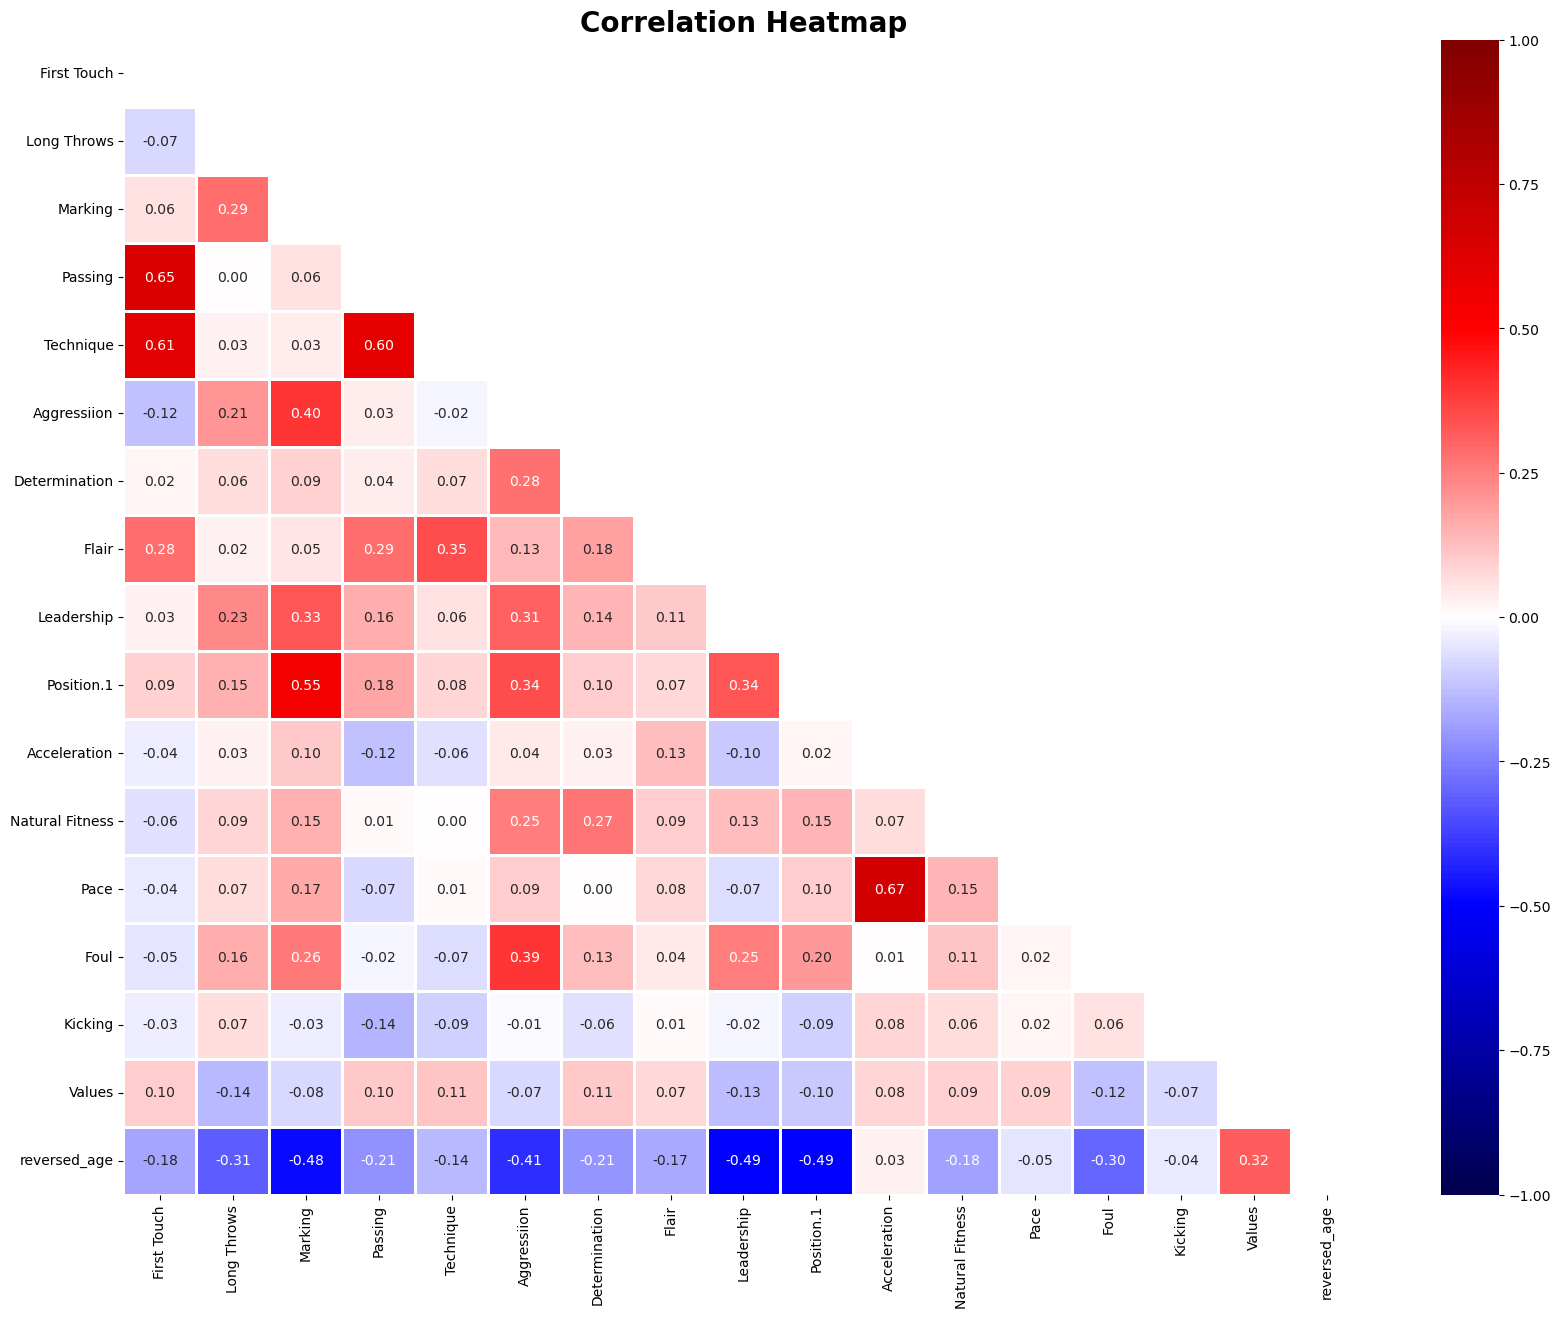

In [25]:

fig = plt.figure(figsize=[20,15])
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix,cmap='seismic',linewidth=1,linecolor='white',vmax = 1, vmin=-1,mask=mask, annot=True,fmt='0.2f')
plt.title('Correlation Heatmap', weight='bold',fontsize=20)
#plt.savefig('heatmap1.png',transparent=True, bbox_inches='tight')

Split

Feature Selection

In [26]:
""" 
# Assuming df is your DataFrame
max_age = amr_df['Age'].max()
amr_df['reversed_age'] = max_age - amr_df['Age']
amr_df.drop(columns=['Age'], inplace=True)
 """

" \n# Assuming df is your DataFrame\nmax_age = amr_df['Age'].max()\namr_df['reversed_age'] = max_age - amr_df['Age']\namr_df.drop(columns=['Age'], inplace=True)\n "

In [27]:
X = amr_df.copy()
y = X.pop("Values")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Feature Selection - Variance

In [28]:
range_var_df = (pd.DataFrame({
                'Range': X_train.max() - X_train.min(),
                'Variance': X_train.var()})
                .sort_values(by='Variance'))

In [29]:
range_var_df.head()

,Range,Variance
Kicking,3,0.751092
Pace,7,1.838479
Passing,10,2.089476
Acceleration,10,2.108902
First Touch,11,2.129221


In [30]:
range_var_df.tail()

,Range,Variance
Flair,12,7.649652
Foul,14,8.093654
Determination,17,8.172709
Leadership,16,9.804969
reversed_age,21,24.132830


ML

In [31]:
""" from xgboost import XGBRegressor

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = RandomizedSearchCV(model_pipeline,
                                param_grid,
                                scoring="neg_mean_absolute_percentage_error",
                                n_iter=50,
                                cv=5,
                                n_jobs=-1,
                                random_state=123)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")
 """

' from xgboost import XGBRegressor\n\nmodel_pipeline = make_pipeline(#StandardScaler(), \n                               XGBRegressor(random_state=123))\n#y_scaler = StandardScaler()\n#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()\n\nparam_grid = {"xgbregressor__n_estimators": [100, 500, 1000],\n              "xgbregressor__max_depth": [3, 5, 7],\n              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}\n\nxgb_search = RandomizedSearchCV(model_pipeline,\n                                param_grid,\n                                scoring="neg_mean_absolute_percentage_error",\n                                n_iter=50,\n                                cv=5,\n                                n_jobs=-1,\n                                random_state=123)\n\nxgb_search.fit(X_train, y_train)\n\nbest_score_search_xgb = xgb_search.best_score_\n\nprint(f"{best_score_search_xgb} MAPE")\n '

In [32]:
from xgboost import XGBRegressor#
from sklearn.model_selection import KFold

model_pipeline = make_pipeline(#StandardScaler(), 
                               XGBRegressor(random_state=123))
#y_scaler = StandardScaler()
#y_train_standardized = y_scaler.fit_transform(y_train.values.reshape(-1, 1)).flatten()

param_grid = {"xgbregressor__n_estimators": [100, 500, 1000],
              "xgbregressor__max_depth": [3, 5, 7],
              "xgbregressor__learning_rate": [0.00000001, 0.0000001, 0.000000001]}

xgb_search = GridSearchCV(model_pipeline,
                          param_grid,
                          scoring="neg_mean_absolute_percentage_error",
                          cv=5,
                          n_jobs=-1)

xgb_search.fit(X_train, y_train)

best_score_search_xgb = xgb_search.best_score_

print(f"{best_score_search_xgb} MAPE")


-0.9995205745000524 MAPE


Metric

In [33]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
dt_predictions = xgb_search.predict(X_test)

In [35]:
dt_mae = mean_absolute_error(y_true = y_test, y_pred = dt_predictions)
dt_rmse = mean_squared_error(y_true = y_test, y_pred = dt_predictions, squared=False)
dt_mape = mean_absolute_percentage_error(y_true = y_test, y_pred = dt_predictions)
dt_r2 = r2_score(y_true = y_test, y_pred = dt_predictions)

In [36]:
pd.DataFrame({"MAE": [dt_mae],
              "RMSE": [dt_rmse],
              "MAPE": [dt_mape],
              "R2": [dt_r2]},
             index=["xgboost"])

,MAE,RMSE,MAPE,R2
xgboost,7.215905e+06,1.184896e+07,0.999729,-0.589453
